# Zadanie 8_3

In [1]:
import numpy as np
import pandas as pd
import math

##### Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


##### Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [3]:
#df.pivot_table(values='Sprzedaż',index='Przedstawiciel',columns='Region',aggfunc=np.sum)
df.pivot_table(values='id',index=['race','signs_of_mental_illness'],aggfunc='count')

id
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

##### Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [4]:
df2 = df.pivot_table(values='id',index=['race','signs_of_mental_illness'],aggfunc='count')
def perentage_mental_problems(value):
     total_amount=df['id'].nunique()
     result = (value / total_amount)
     return result
#total_amount=df['id'].nunique()

In [5]:
df2['% of cases']=df2['id'].apply(lambda x: perentage_mental_problems(x))
df2

id  % of cases
race signs_of_mental_illness                  
A    False                      69    0.012740
     True                       24    0.004431
B    False                    1114    0.205687
     True                      184    0.033973
H    False                     745    0.137555
     True                      157    0.028988
N    False                      64    0.011817
     True                       14    0.002585
O    False                      37    0.006832
     True                       11    0.002031
W    False                    1763    0.325517
     True                      713    0.131647

##### Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [6]:
#df['date'] = pd.to_datetime(df['date'])
df['Day'] =pd.to_datetime(df['date'])

df['Day name']= df['Day'].dt.day_name()
#df['Day number']= df['Day'].get_weekday()
#df.sort_values(by='Day', key=lambda col: col.dt.dayofweek)
df3 = df.pivot_table(values='id',index=['Day name'],aggfunc='count')

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

#days = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
#df4['#day'] = df['Day'].apply(lambda x: days[x])

df3

,id
Day name,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [7]:
import calendar
week_days = list(calendar.day_name)
#week_days
df3_sorted = df3.sort_values(by='Day name', key=lambda x: x.map({day: i for i, day in enumerate(week_days)}))
#df3_sorted

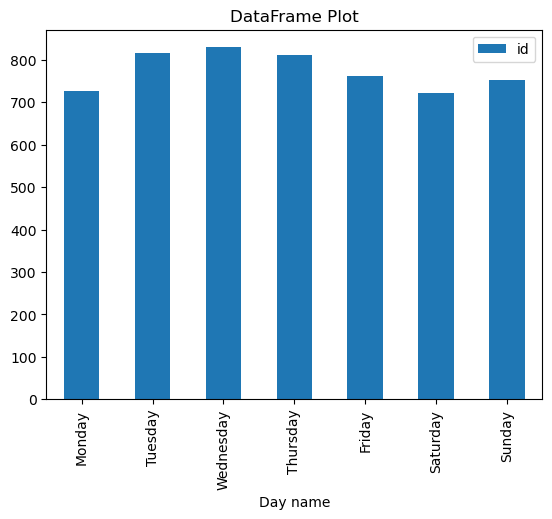

In [8]:
plot = df3_sorted.plot(title="DataFrame Plot",kind='bar')

##### Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [9]:
#.head()

In [10]:
# wczytywanie populacji
state_by_population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
df_state_by_population = pd.DataFrame(state_by_population[0])
df_state_by_population['key'] = df_state_by_population['State']
df_state_by_population
#df_state_by_population.columns

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]",key
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%,California
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%,Texas
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%,Florida
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%,New York
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%,Pennsylvania
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%,Illinois
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%,Ohio
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%,Georgia
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%,North Carolina
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%,Michigan


In [11]:
# wczytywanie skrótów
state_abbreviations = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
df_state_abbreviations = pd.DataFrame(state_abbreviations[1])
df_state_abbreviations['key'] = df_state_abbreviations['Name']
df_state_abbreviations['key2'] = df_state_abbreviations['USCG']
df_state_abbreviations.head()

,Name,Status of region,ISO,ANSI,USPS (& ANSI),USCG,GPO,AP,Court,Others,key,key2
0,Name,Status of region,NaN,NaN,NaN,NaN,GPO,AP,Court,Others,Name,NaN
1,United States of America,Federal state (not defined by USPS),US USA 840,0.0,US,NaN,U.S.,U.S.,U.S.,U.S.A.,United States of America,NaN
2,Alabama,State,US-AL,1.0,AL,AL,Ala.,Ala.,Ala.,NaN,Alabama,AL
3,Alaska,State,US-AK,2.0,AK,AK,Alaska,Alaska,Alaska,Ak.[3],Alaska,AK
4,Arizona,State,US-AZ,4.0,AZ,AZ,Ariz.,Ariz.,Ariz.,NaN,Arizona,AZ


laczenie tabel

In [12]:
df_population_abbr = pd.merge(df_state_by_population,df_state_abbreviations,how='inner',on='key')
#df_population_abbr['Census population, April 1, 2020 [1][2]'].rename('population')
df_population_abbr = df_population_abbr.rename(columns={'Census population, April 1, 2020 [1][2]': 'population'})
df_population_abbr.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,population,"Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,...,Status of region,ISO,ANSI,USPS (& ANSI),USCG,GPO,AP,Court,Others,key2
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,...,State,US-CA,6.0,CA,CF,Calif.,Calif.,Cal.,Cal.,CF
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,...,State,US-TX,48.0,TX,TX,Tex.,Texas,Tex.,NaN,TX
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,...,State,US-FL,12.0,FL,FL,Fla.,Fla.,Fla.,NaN,FL
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,...,State,US-NY,36.0,NY,NY,N.Y.,N.Y.,N.Y.,N. York[4],NY
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,...,State,US-PA,42.0,PA,PA,Pa.,Pa.,Pa.,"Penn.,[3] Penna.[6]",PA


In [13]:
df['key2'] = df['state']
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day,Day name,key2
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015-01-02,Friday,WA
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015-01-02,Friday,OR
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015-01-03,Saturday,KS
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015-01-04,Sunday,CA
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015-01-04,Sunday,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,2020-06-13,Saturday,MO
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,2020-06-13,Saturday,CA
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,2020-06-15,Monday,KS
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,2020-06-16,Tuesday,IL


In [14]:
df_4 = pd.merge(df,df_population_abbr,how='inner',on='key2')
df_4

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,Name,Status of region,ISO,ANSI,USPS (& ANSI),USCG,GPO,AP,Court,Others
0,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,Oregon,State,US-OR,41.0,OR,OR,Oreg.,Ore.,Or.,NaN
1,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,...,Oklahoma,State,US-OK,40.0,OK,OK,Okla.,Okla.,Okla.,NaN
2,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,...,Arizona,State,US-AZ,4.0,AZ,AZ,Ariz.,Ariz.,Ariz.,NaN
3,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,...,Iowa,State,US-IA,19.0,IA,IA,Iowa,Iowa,Iowa,Ioa.[a]
4,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,...,Pennsylvania,State,US-PA,42.0,PA,PA,Pa.,Pa.,Pa.,"Penn.,[3] Penna.[6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,...,Indiana,State,US-IN,18.0,IN,IN,Ind.,Ind.,Ind.,NaN
4023,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,...,Missouri,State,US-MO,29.0,MO,MO,Mo.,Mo.,Mo.,NaN
4024,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,...,Missouri,State,US-MO,29.0,MO,MO,Mo.,Mo.,Mo.,NaN
4025,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,...,Illinois,State,US-IL,17.0,IL,IL,Ill.,Ill.,Ill.,NaN


In [15]:
#df_4.columns

In [16]:
#df_5 = df_4.pivot_table(values='id',index=['key'],columns['population'],aggfunc=np.sum)
#df_5
#df_4['population']

In [17]:
# grupowanie wg. stanów i zliczanie przestępstw i tworzenie tabelii - przestepstwa vs stany
df_7=df_4.groupby('state')['id'].count()
df_8 = pd.DataFrame(df_7)
df_8['key2'] = df_8.index
df_8.head()


,id,key2
state,,
AK,39,AK
AL,104,AL
AR,83,AR
AZ,254,AZ
CT,21,CT


In [18]:
#df_population_abbr.columns

In [19]:
# wyboror kolumn w tabeli skrótów
# laczenie tabeli przestepst w poszczegolnych stanach z tabela skrótów
df_9 = df_population_abbr[['key2','population','State']]
df_crime_population = pd.merge(df_8,df_9,how='inner',on='key2')
df_crime_population.rename(columns={'id':'cases'},inplace=True)
#df_crime_population.columns


In [20]:
# funkcja przeliczajaca ilosc przypadkow na 1000 mieszkanco
def cases_per_1000(cases, population):
    return (cases/population)*1000

In [21]:
df_crime_population['cases per 1000'] = df_crime_population.apply(lambda x: cases_per_1000(x['cases'], x['population'] ),axis=1)

In [22]:
df_crime_population.sort_values(by='cases per 1000',ascending = False)

,cases,key2,population,State,cases per 1000
0,39,AK,733391,Alaska,0.053178
25,106,NM,2117522,New Mexico,0.050059
29,164,OK,3959353,Oklahoma,0.041421
3,254,AZ,7151502,Arizona,0.035517
26,96,NV,3104614,Nevada,0.030922
40,54,WV,1793716,West Virginia,0.030105
20,31,MT,1084225,Montana,0.028592
2,83,AR,3011524,Arkansas,0.027561
16,78,MI,2961279,Mississippi,0.026340
41,14,WY,576851,Wyoming,0.024270
